In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *
from linares_plot import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [2]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_trdist_isol.xlsx']
paths_target_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_trdist_isol.xlsx']

In [3]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_trdist_isol.xlsx']
paths_distractor_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_trdist_isol.xlsx']

In [4]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['trained'] = df_target['trained'].replace(['trdist'], ['dist'])

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['trained'] = df_target_shuff['trained'].replace(['trtdist'], ['dist'])

In [5]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['trained'] = df_distractor['trained'].replace(['trdist'], ['dist'])


####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['trained'] = df_distractor_shuff['trained'].replace(['trdist'], ['dist'])


In [6]:
df = pd.concat([df_target, df_distractor])
df.head()

,times,decoding,region,subject,condition,label,item,trained
0,0.000,-4.569766,ips,n001,2_0.2,signal,target,dist
1,2.335,-5.463212,ips,n001,2_0.2,signal,target,dist
2,4.670,-2.216977,ips,n001,2_0.2,signal,target,dist
3,7.005,-1.619713,ips,n001,2_0.2,signal,target,dist
4,9.340,2.070236,ips,n001,2_0.2,signal,target,dist


In [7]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained
0,0.000,0.108931,visual,d001,1_0.2,shuffle,target,trdist
1,2.335,-0.806392,visual,d001,1_0.2,shuffle,target,trdist
2,4.670,-0.897047,visual,d001,1_0.2,shuffle,target,trdist
3,7.005,-0.547003,visual,d001,1_0.2,shuffle,target,trdist
4,9.340,0.130638,visual,d001,1_0.2,shuffle,target,trdist


In [10]:
df_delay=[]
for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target', 'dist']:
                ####
                if cond == '1_0.2':
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &                                           
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                    ###
                    df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )
                    #                    
                elif cond == '2_0.2':
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &  
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std() 
                    ###
                    df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )    
                    #
                elif cond =='1_7':
                    if item=='target':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                    ####
                    elif item=='dist':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )        
                        #
                    #
                #
                elif cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                    if item=='target':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                        #
                    elif item=='dist':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                    ####
                ###
            ###
        ##
    ##
##
##
##
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay dist alone'


In [ ]:
df_time=[]

for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target', 'dist']:
                for t in df.times.unique(): 
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['item']==item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['item']==item)].decoding.mean()
                    #
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff
                    df_time.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], item] )   
                    ####)
#
df_time = pd.DataFrame(df_time)
df_time.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'item']

Text(0.5,1,'d0.2 cond, tr: dist alone')

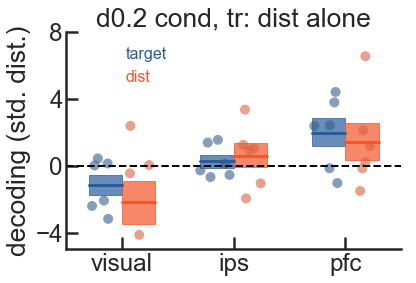

In [17]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('d0.2 cond, tr: dist alone')

Text(0.5,1,'d7 cond, tr: dist alone')

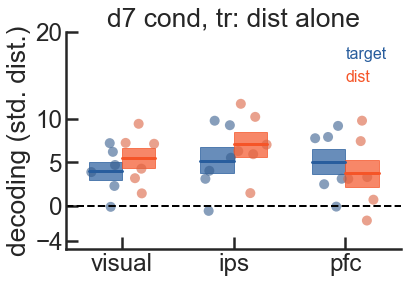

In [18]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')], 
            palette=['#285d9d', '#f55528'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,20)
plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('d7 cond, tr: dist alone')

In [ ]:
presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active


def tiemcourse_4_conditions(df_plot, title_plot, decoding_thing='target'):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = ['darkblue',  'darkorange',  'darkgreen'] #sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(12,10))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            condition_title = 'o:1, d:0.2'
            y_label_cond = 'decoding ' + decoding_thing + ' (std)'
            x_label_cond = ''
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            condition_title = 'o:1, d:7'
            y_label_cond = '' 
            x_label_cond = ''
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            condition_title = 'o:2, d:0.2'
            y_label_cond = 'decoding ' + decoding_thing + ' (std)'
            x_label_cond = 'time (s)'        
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            condition_title = 'o:2, d:7'
            y_label_cond = '' 
            x_label_cond = 'time (s)' 
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 35]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -10 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 10 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='region', ci=68,
                     hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response
        #
        TITLE_BR = condition_title 
        plt.title(TITLE_BR, fontsize=20) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,10,15,20,25,30,35], fontsize=15) #just this tcks
        plt.ylim(-20, 20)
        plt.yticks([-20, -10, 0 , 10, 20], fontsize=15)
        plt.xlim(xlim)
        plt.xlabel(x_label_cond, fontsize=20)
        plt.ylabel(y_label_cond, fontsize=20)
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(frameon=False, bbox_to_anchor=(1.1, 1.05), fontsize=15)
            plt.xticks([5,10, 15, 20, 25,30,35], fontsize=15)

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( title_plot, fontsize=25) ## main title
    plt.tight_layout(w_pad=1, h_pad=1, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    


In [ ]:
df_x = df_time.loc[(df_time['item']=='target') ]
tiemcourse_4_conditions(df_x , 'tarined on dist')

In [ ]:
df_x = df_time.loc[(df_time['item']=='dist') ]
tiemcourse_4_conditions(df_x , 'Decode: dist ; tr:dist alone')